In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as mpl
import json


with open("parsed.json", "r", encoding='UTF-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df

,area,distance_to_metro,build_year,has_parking,floor,is_new,price,price_m2,date_added
0,133.00,8793.806144,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14444.384654,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7790.755856,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4281.306863,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,539.849235,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,478.316283,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,478.316283,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,511.467699,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,511.467699,2002.0,True,6,False,1380000.0,20000.00,None


In [3]:
df.isnull().sum()

area                     0
distance_to_metro        0
build_year             706
has_parking              0
floor                    0
is_new                   0
price                    0
price_m2                 0
date_added           10058
dtype: int64

In [4]:
df.dtypes

area                 float64
distance_to_metro    float64
build_year           float64
has_parking             bool
floor                  int64
is_new                  bool
price                float64
price_m2             float64
date_added            object
dtype: object

In [5]:
#zamiana z metrów na km
df["distance_to_metro"] = df["distance_to_metro"].apply(lambda x: round(x/1000, 3))
df

,area,distance_to_metro,build_year,has_parking,floor,is_new,price,price_m2,date_added
0,133.00,8.794,2023.0,True,0,False,1075000.0,8082.71,None
1,56.00,14.444,NaN,True,2,False,725000.0,12946.43,None
2,60.00,7.791,2024.0,True,0,True,820000.0,13666.67,None
3,130.84,4.281,2025.0,True,0,True,1390000.0,10623.66,None
4,50.00,0.540,1977.0,False,4,False,775000.0,15500.00,None
...,...,...,...,...,...,...,...,...,...
10053,197.46,0.478,2004.0,False,6,False,3790000.0,19193.76,None
10054,96.30,0.478,2004.0,True,5,False,2215000.0,23001.04,None
10055,55.00,0.511,2002.0,True,4,False,964000.0,17527.27,None
10056,69.00,0.511,2002.0,True,6,False,1380000.0,20000.00,None


In [6]:
df.describe()[1:].apply(lambda x: round(x, 3))


,area,distance_to_metro,build_year,floor,price,price_m2
mean,60.039,2.219,1995.803,3.193,1.155377e+06,18872.345
std,36.656,2.096,29.282,3.127,9.496621e+05,6421.052
min,14.530,0.001,1820.000,-1.000,7.820000e+02,13.030
25%,40.592,0.623,1972.000,1.000,6.900000e+05,14900.000
50%,52.440,1.551,2006.000,2.000,8.740625e+05,17526.320
75%,68.000,3.215,2023.000,4.000,1.262000e+06,21242.858
max,1892.030,14.568,2027.000,45.000,1.700000e+07,170000.000


In [7]:
#analiza i eliminacja outliersów

Data Visualization

Text(0.86, 1000, '19.53%')

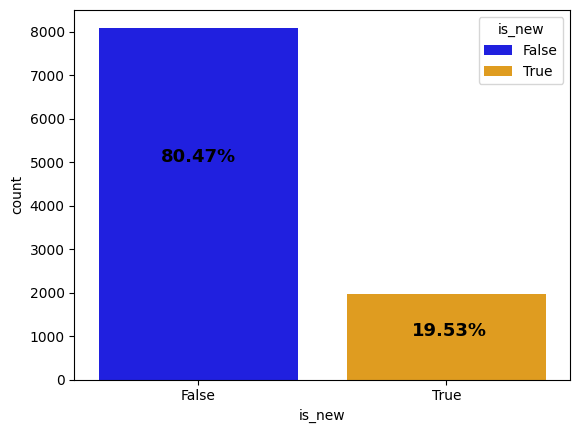

In [8]:
#ilość nowych i starych ogłoszeń 
sns.countplot(x = df["is_new"], hue = df.is_new, palette=["blue", "orange"])

mpl.text(-0.15, 5000, s = f"{round(df[df["is_new"] == False].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.text(0.86, 1000, s = f"{round(df[df["is_new"] == True].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')


Text(0.86, 3000, '49.85%')

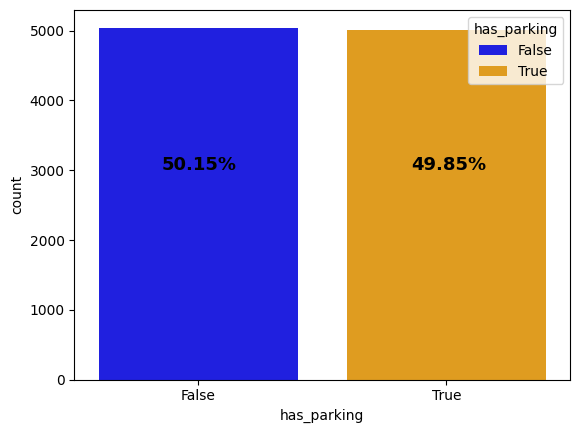

In [9]:
#ilość ogłoszeń, które zawierają parking lub nie
sns.countplot(x = df["has_parking"], hue = df.has_parking, palette=["blue", "orange"])

mpl.text(-0.15, 3000, s = f"{round(df[df["has_parking"] == False].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

mpl.text(0.86, 3000, s = f"{round(df[df["has_parking"] == True].shape[0]/ df.shape[0] * 100, 2)}%",
        fontsize=13, color='black', weight='bold')

(0.0, 250.0)

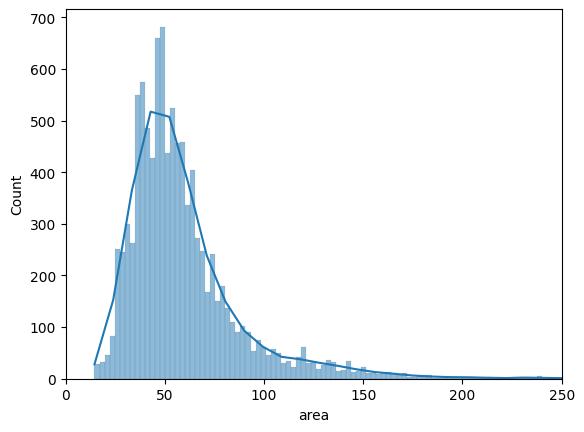

In [10]:
#Wizualizacja rozkładu powierzchni mieszkań
sns.histplot(x= df.area, kde = True)
mpl.xlim(0,250)

<Axes: xlabel='floor', ylabel='Count'>

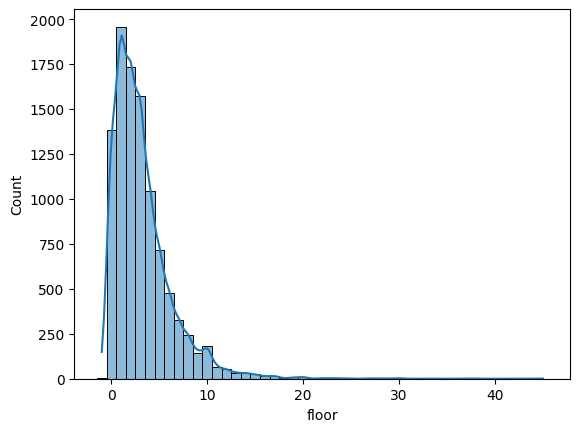

In [11]:
#Wizualizacja rozkładu pięter
sns.histplot(x = df["floor"], kde=True, discrete=True)

(5000.0, 50000.0)

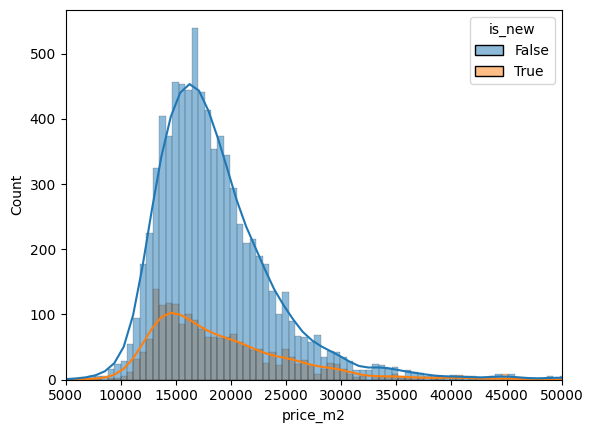

In [12]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od rodzaju zabudowy)
sns.histplot(x = df["price_m2"], kde=True, hue=df["is_new"])
mpl.xlim(5000, 50000)

(5000.0, 50000.0)

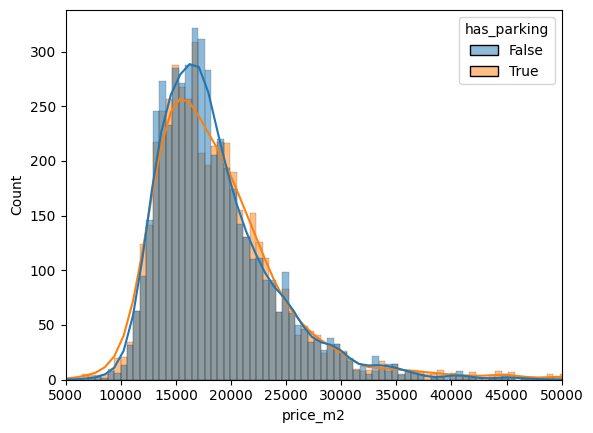

In [13]:
#Wizualizacja rozkładu ceny za metr kwadratowy (w zależności od tego czy oferta zawiera parking)
sns.histplot(x = df["price_m2"], kde=True, hue=df["has_parking"])
mpl.xlim(5000, 50000)

<Axes: xlabel='distance_to_metro', ylabel='Count'>

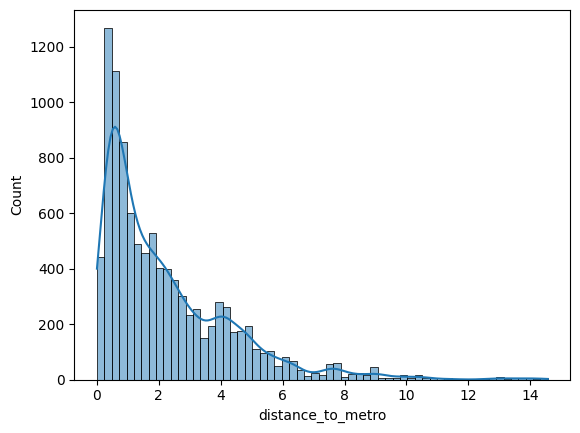

In [14]:
#Wizualizacja rozkładu odległości od metra
sns.histplot(x=df.distance_to_metro, kde=True)

(0.0, 8.0)

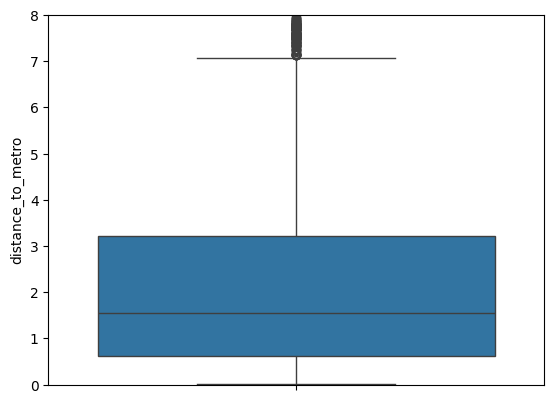

In [15]:
#Boxplot rozkładu odległości od metra
sns.boxplot(y = df.distance_to_metro)
mpl.ylim(0, 8)

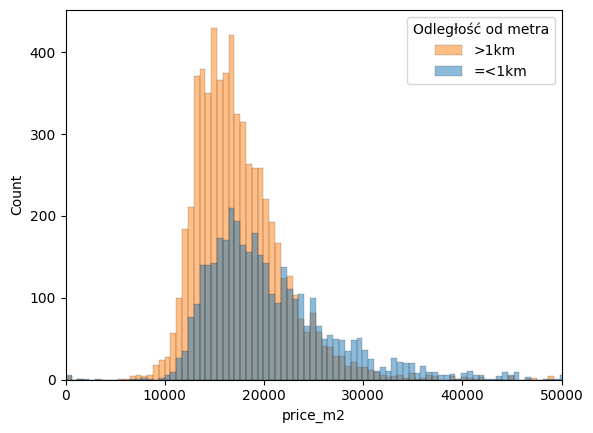

In [16]:
#zależność miedzy ceną za metr kwadratowy a odległością od metra

sns.histplot(x= df.price_m2 ,hue = df.distance_to_metro.apply(lambda x: x > 1))
mpl.xlim(0,50000)
mpl.legend(title = "Odległość od metra",labels = [">1km", "=<1km"])

(1900.0, 2037.35)

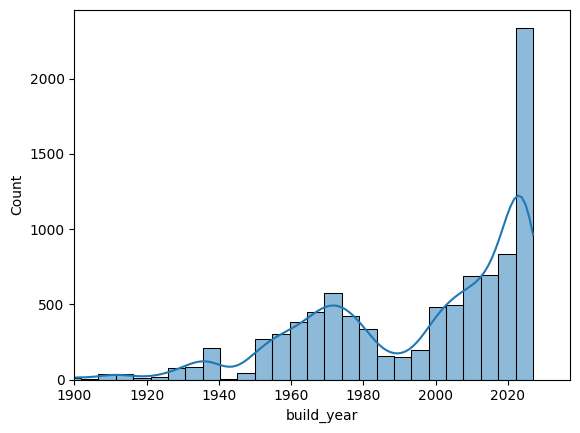

In [17]:
#Wizualizacja rozkładu roku wybudowania mieszkania
sns.histplot(x = df.build_year, kde = True)
mpl.xlim(1900,)

Text(0.5, 0, 'Wiek mieszkania')

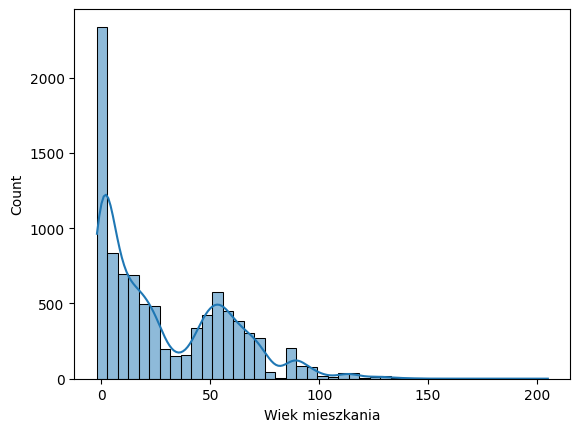

In [18]:
#Wizualizacja wieku mieszkania - > to samo co poprzednio tyle że odwrócone
sns.histplot( x = df["build_year"].copy(deep =True).apply(lambda x: 2025-x), kde = True)
mpl.xlabel("Wiek mieszkania")

<Axes: ylabel='build_year'>

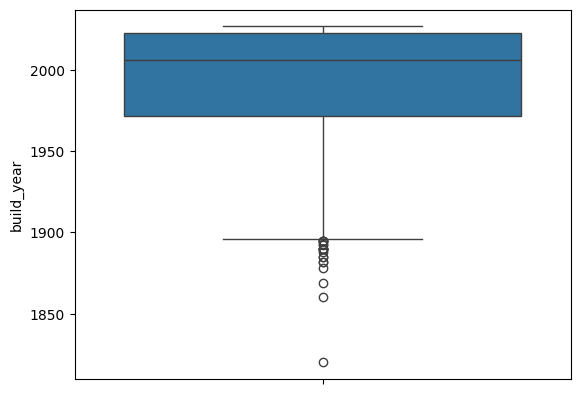

In [19]:
#Boxplot rozkładu daty wubudowania
sns.boxplot(y = df.build_year)

Data Preprocessing

In [20]:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import normalize
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler


df.drop(columns=["price", "date_added"], axis=1, inplace=True)  # Usunięcie zbędnych kolumn
imputer = SimpleImputer(strategy="mean", copy=True)

#imputacja kolumny build_year
df["build_year"] = pd.Series(imputer.fit_transform(df[["build_year"]]).ravel(), index=df.index)

#usunięcie rekordów zbyt oddalonych od metra
df = df[df["distance_to_metro"] < 8]

#usunięcie outliersów
lof = LocalOutlierFactor()
outliers = lof.fit_predict(df)
df = df[outliers == 1]  

#normalizacja danych
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)


In [21]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,area,distance_to_metro,build_year,has_parking,floor,is_new,price_m2
0,0.155602,0.980367,0.979310,1.0,0.026316,1.0,0.104028
1,0.398022,0.538636,0.986207,1.0,0.026316,1.0,0.052305
2,0.121381,0.067833,0.655172,0.0,0.131579,0.0,0.135190
3,0.173055,0.537251,0.779310,1.0,0.105263,0.0,0.093663
4,0.100506,0.587969,0.820690,0.0,0.236842,0.0,0.107913
...,...,...,...,...,...,...,...
9480,0.049517,0.005915,0.593103,0.0,0.131579,0.0,0.147205
9481,0.279823,0.060030,0.841379,1.0,0.157895,0.0,0.262687
9482,0.138492,0.064183,0.827586,1.0,0.131579,0.0,0.169648
9483,0.186401,0.064183,0.827586,1.0,0.184211,0.0,0.211677


In [22]:
#processed data frame with both categorical and numerical columns
df_processed = df_scaled.copy(deep = True)

#processed data frame with no categorical columns
df_processed_ncat = df_scaled.drop(columns=[col for col in df.columns if col in ["has_parking","is_new"]], axis=1)

Building Models

In [23]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import calinski_harabasz_score, silhouette_score,davies_bouldin_score

def calculate_scores(data, labels, dict):
    dict["Calinski-Harabasz"].append(calinski_harabasz_score(X=data, labels=labels))
    dict["Silhouette"].append(silhouette_score(X=data, labels=labels))
    dict["Davies-Bouldin"].append(davies_bouldin_score(X=data, labels=labels))

In [31]:

def Kmeans_scoring_df(data: pd.DataFrame):
    
    dictionary = {"clusters":range(5,201,3), "Calinski-Harabasz":[], "Silhouette":[],"Davies-Bouldin":[], "WCSS": []}

    for clusters in dictionary["clusters"]:

        kmeans = KMeans(n_clusters= clusters, max_iter= 500,random_state=42) 
        #fit_transform - odl od centroidów
        #fit_predict - label 

        kmeans.fit(data)
        calculate_scores(data ,kmeans.labels_, dictionary)
        dictionary["WCSS"].append(kmeans.inertia_)

    df_result = pd.DataFrame(dictionary)
    df_result.set_index("clusters", inplace=True)

    return df_result


In [32]:
Kmeans_df_results = Kmeans_scoring_df(df_processed)
Kmeans_df_results_ncat = Kmeans_scoring_df(df_processed_ncat)

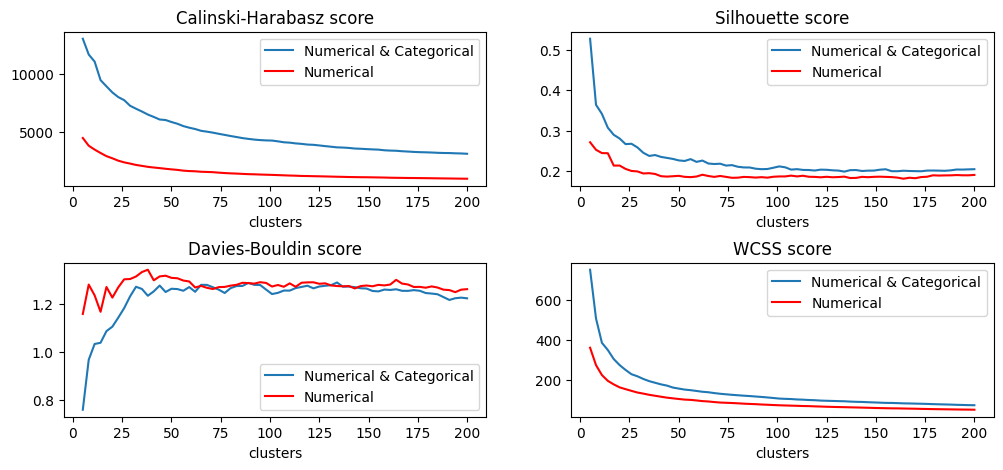

In [34]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 5))

for idx, score in enumerate(Kmeans_df_results.columns):

    posx, posy = int(idx >= 2), int(idx % 2)
    
    sns.lineplot(x=Kmeans_df_results.index, y=Kmeans_df_results[score], ax=axes[posx, posy],label="Numerical & Categorical")
    sns.lineplot(x=Kmeans_df_results_ncat.index, y=Kmeans_df_results_ncat[score], ax=axes[posx, posy], color="r", label="Numerical")
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")
    

mpl.subplots_adjust(hspace=0.5)



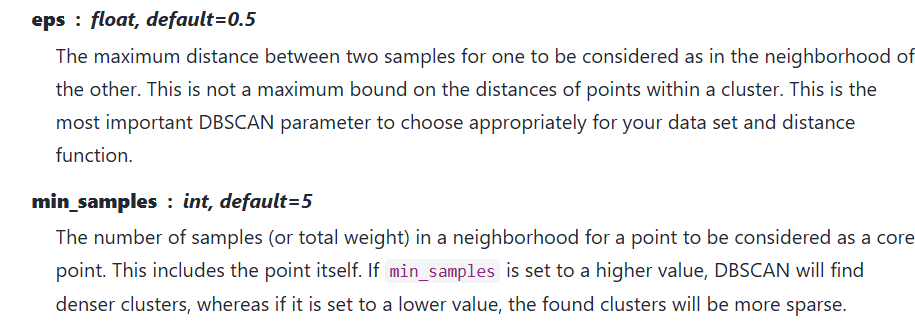

In [36]:
#naprawić dbscan cuś sie podziało -> pewnie wina normalizacji i trzeba dobrac odpowiednio maly epsilon

# większy epsilon - > mniejszy noise
# większy min_samples - > większy noise

def DBscan_scoring_df(data: pd.DataFrame):

    dictionary = {"clusters":  [], "Calinski-Harabasz":[], "Silhouette":[],"Davies-Bouldin":[], "Noise": []}

    epsilon = np.arange(0.05,0.26, 0.02)
    min_samples = np.arange(5, 10, 1)

    cartesian_product = np.array(np.meshgrid(epsilon, min_samples)).T.reshape(-1, 2)

    for epsilon, samples in cartesian_product:     

        dbscan = DBSCAN(eps = epsilon, min_samples= int(samples) , n_jobs = -1)
        dbscan.fit_predict(data)
        """
        print(len(set(dbscan.labels_)), epsilon, samples)
        
        if len(set(dbscan.labels_))> 1:
            calculate_scores(data, dbscan.labels_, dictionary)
        else:
            for score in list(dictionary.keys())[:-1]:
                dictionary[score].append(None
        """
        calculate_scores(data, dbscan.labels_, dictionary)
        dictionary["Noise"].append(np.sum(dbscan.labels_ == -1))
        dictionary["clusters"].append(len(set(dbscan.labels_)))

    return pd.concat([pd.DataFrame(cartesian_product, columns=["epsilon", "min_samples"]), pd.DataFrame(dictionary)], axis = 1)



In [37]:
DBscan_df_results = DBscan_scoring_df(df_processed)
DBscan_df_results_ncat = DBscan_scoring_df(df_processed_ncat)

In [38]:
DBscan_df_results

,epsilon,min_samples,clusters,Calinski-Harabasz,Silhouette,Davies-Bouldin,Noise
0,0.05,5.0,131,102.192875,-0.466567,1.169405,3665
1,0.05,6.0,116,97.808584,-0.451613,1.135510,4183
2,0.05,7.0,93,102.376958,-0.420873,1.148442,4659
3,0.05,8.0,85,95.151246,-0.458442,1.138753,5099
4,0.05,9.0,68,101.858281,-0.456627,1.111117,5540
5,0.07,5.0,53,560.310968,-0.200499,1.108509,1307
6,0.07,6.0,42,636.042452,-0.214305,1.143869,1512
7,0.07,7.0,38,644.048149,-0.213891,1.141520,1701
8,0.07,8.0,31,740.756250,-0.204839,1.143515,1888
9,0.07,9.0,29,738.326221,-0.215048,1.179975,2060


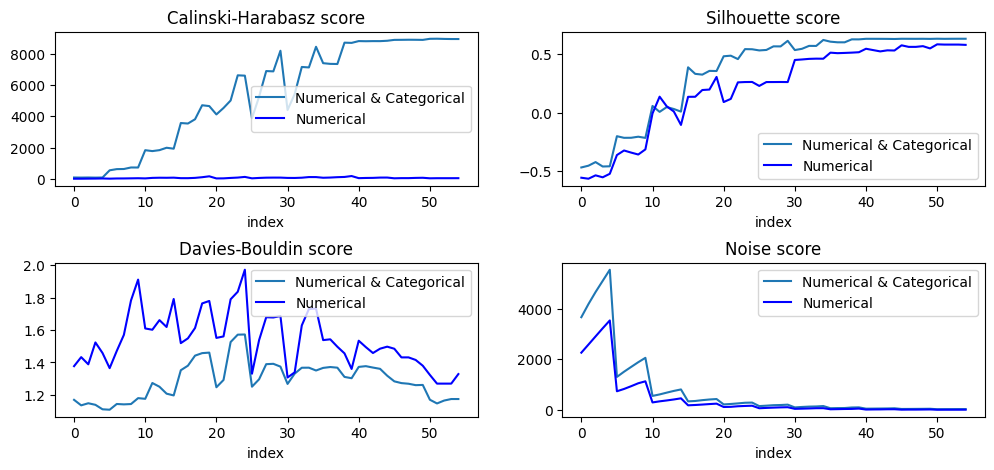

In [39]:
fig, axes = mpl.subplots(2, 2, figsize=(12, 5))

highlight_idx = np.arange(0,35,5)  

for idx, score in enumerate(DBscan_df_results.columns[3:]):

    posx, posy = int(idx >= 2), int(idx % 2)
    
    sns.lineplot(x=DBscan_df_results.index, y=DBscan_df_results[score], ax=axes[posx, posy], label="Numerical & Categorical")
    sns.lineplot(x=DBscan_df_results_ncat.index, y=DBscan_df_results_ncat[score], ax=axes[posx, posy], color="blue", label="Numerical")
    #sns.scatterplot(x = DBscan_df_results.index[highlight_idx], y =DBscan_df_results[score][highlight_idx], 
    #                color='green', zorder=3, label="Epsilon change" , ax=axes[posx,posy])
    
    axes[posx, posy].set_xlabel("index")
    axes[posx, posy].set_ylabel("")
    axes[posx, posy].set_title(score + " score")

mpl.subplots_adjust(hspace=0.5)

#trzeba znaleźć w miarę optymalne (epsilon,min_samples)


Text(0.5, 0, 'index')

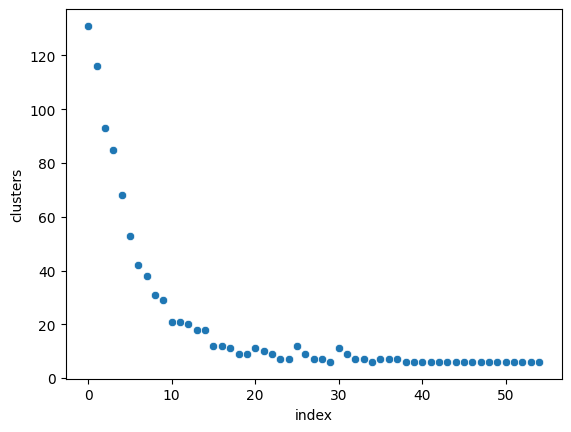

In [40]:
sns.scatterplot(x = DBscan_df_results.index, y = DBscan_df_results["clusters"])
mpl.xlabel("index")